# Cardiovascular Disease (CVD) Spatial Analysis

In [ ]:
# Jack Daley
# AOS C111: Machine Learning

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [301]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [302]:
import geopandas as gpd

In [303]:
# Read in data, create dataframe, remove spaces in important feature names.

df = pd.read_csv('enviroscreen.csv')
df = df.rename(columns={'Cardiovascular Disease': 'CardiovascularDisease'})
df = df.rename(columns={'Total Population': 'TotPop'})
df

,Census Tract,TotPop,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.18,100.00,95-100% (highest scores),...,79.37,76.0,98.92,12.8,93.83,30.3,91.04,93.16,9.66,99.72
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.65,99.99,95-100% (highest scores),...,95.53,73.2,98.39,19.8,99.21,31.2,92.28,93.17,9.66,99.74
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.39,99.97,95-100% (highest scores),...,81.55,62.6,93.39,6.4,61.53,20.3,63.97,83.75,8.69,95.79
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.33,99.96,95-100% (highest scores),...,78.71,65.7,95.35,15.7,97.35,35.4,96.41,94.64,9.82,99.89
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.75,99.95,95-100% (highest scores),...,86.56,72.7,98.30,13.7,95.29,32.7,94.16,95.40,9.90,99.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,6107004000,582,Tulare,93257,Porterville,-118.983849,36.038061,NaN,NaN,NaN,...,NaN,79.6,99.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8031,6109985202,2509,Tuolumne,95327,Unincorporated Tuolumne County area,-120.537071,37.891939,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8032,6111001206,778,Ventura,93001,Unincorporated Ventura County area,-119.371944,34.343903,NaN,NaN,NaN,...,NaN,17.1,27.35,NaN,NaN,24.4,78.47,NaN,NaN,NaN
8033,6111003012,675,Ventura,93036,Oxnard,-119.180105,34.235076,NaN,NaN,NaN,...,99.55,96.7,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
# Obtain CA counties shapefile for appropriate visualization
boundary_shapefile = gpd.read_file('/Users/jackdaley/Downloads/tl_2019_06_cousub/tl_2019_06_cousub.shp')
state_shapefile = gpd.read_file('/Users/jackdaley/Downloads/ca-state-boundary/CA_State_TIGER2016.shp')

# function to filter the shapefile based on coordinate boundaries 
def filter_shapefile(df, min_lon, max_lon, min_lat, max_lat):
    return df.cx[min_lon:max_lon, min_lat:max_lat]

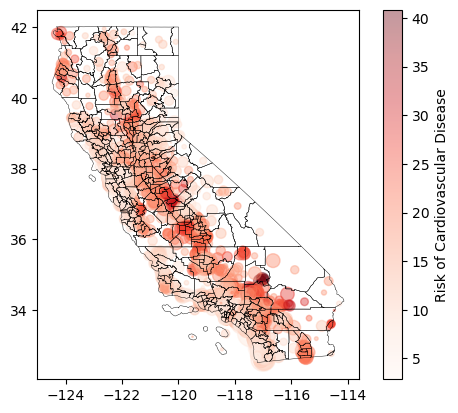

In [305]:
# Visualize the Data Spatially

columns = df.columns.to_numpy()
# grabbing all of the columns, turning them into a numpy array. array contains all of the column names.
    
for i in range(len(columns)):
    globals()[columns[i]] =  df[columns[i]].to_numpy()
    # changing each individual column in the dataframe to a numpy array.

plt.scatter(Longitude,Latitude,alpha=0.4,s=TotPop/100,c=CardiovascularDisease,cmap=plt.get_cmap("Reds"))

boundary_shapefile.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=0.3)  # Add county/region shapefile

plt.colorbar(label="Risk of Cardiovascular Disease", orientation="vertical") 


plt.show() 

# s (marker size) depends on the population. large pops give large s values. c (color)
# is the median house value. 'Reds' cmap is a color ramp. good for this data.

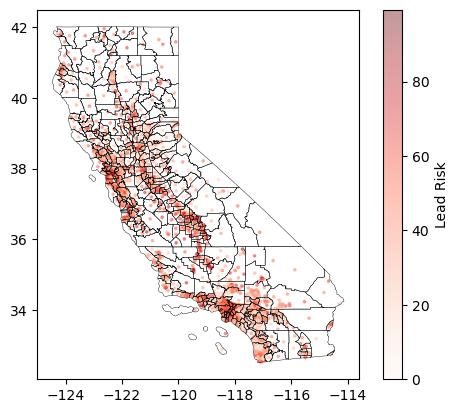

In [306]:
# Visualize an 'urban' variable

plt.scatter(Longitude,Latitude,alpha=0.4,s=3,c=Lead,cmap=plt.get_cmap("Reds"))
boundary_shapefile.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=0.3)  # Add county/region shapefile
plt.colorbar(label="Lead Risk", orientation="vertical") 
plt.show() 

In [307]:
print(df['TotPop'].mean())

4889.047542003734


/var/folders/b3/cvbjtvfd0ggdkrcph4mrtmcc0000gn/T/ipykernel_41822/307022883.py:3: RuntimeWarning: divide by zero encountered in log
  plt.scatter(Longitude,Latitude,alpha=0.4,s=3,c=np.log(Pesticides),cmap=plt.get_cmap("Reds"))


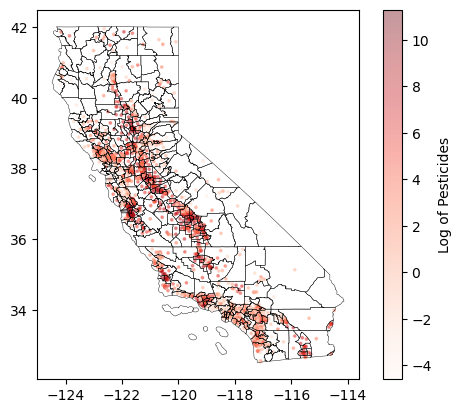

In [308]:
# visualize a 'rural' variable

plt.scatter(Longitude,Latitude,alpha=0.4,s=3,c=np.log(Pesticides),cmap=plt.get_cmap("Reds"))
boundary_shapefile.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=0.3)  # Add county/region shapefile
plt.colorbar(label="Log of Pesticides", orientation="vertical") 
plt.show()

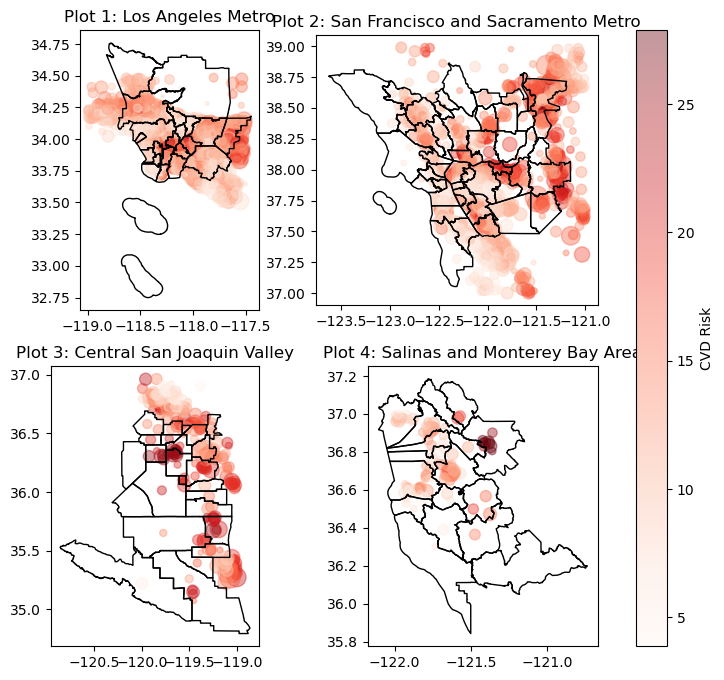

In [309]:
# Create Subsets- 2 primarily urban areas and two primarily rural areas
# 1: Los Angeles Metro (urban)
latitude_range1 = (33.5, 34.5)
longitude_range1 = (-119, -117.5)

# 2: San Francisco Metro (urban)
latitude_range2 = (37,39)
longitude_range2 = (-123,-121)

#3: Central San Joaquin Valley (rural)
latitude_range3 = (35,37)
longitude_range3 = (-120,-119)

#4: Monterey Bay Area (rural)
latitude_range4 = (36.2, 37)
longitude_range4 = (-122,-121.3)

# Filter the shapefiles accordingly
filtered_shapefileLA = filter_shapefile(boundary_shapefile, -118.5, -117.8, 33.8, 34.4)
filtered_shapefileSF = filter_shapefile(boundary_shapefile, -123, -121.5, 37.5, 38.5)
filtered_shapefileSJV = filter_shapefile(boundary_shapefile, -120,-119.3,35.3,36.5)
filtered_shapefileMBA = filter_shapefile(boundary_shapefile, -122,-121.5, 36.2,37)


# Create new DataFrames and variables for each of the subsets
#1 Los Angeles:
subset_df = df.loc[(df['Latitude'].between(*latitude_range1)) & (df['Longitude'].between(*longitude_range1))]
lat = subset_df['Latitude']
long = subset_df['Longitude']
pop = subset_df['TotPop']
CVD = subset_df['CardiovascularDisease']

#2 San Francisco:
subset_df2 = df.loc[(df['Latitude'].between(*latitude_range2)) & (df['Longitude'].between(*longitude_range2))]
lat2 = subset_df2['Latitude']
long2 = subset_df2['Longitude']
pop2 = subset_df2['TotPop']
CVD2 = subset_df2['CardiovascularDisease']

#3 Central San Joaquin Valley:
subset_df3 = df.loc[(df['Latitude'].between(*latitude_range3)) & (df['Longitude'].between(*longitude_range3))]
lat3 = subset_df3['Latitude']
long3 = subset_df3['Longitude']
pop3 = subset_df3['TotPop']
CVD3 = subset_df3['CardiovascularDisease']

#4 Salinas and Monterey Bay Area
subset_df4 = df.loc[(df['Latitude'].between(*latitude_range4)) & (df['Longitude'].between(*longitude_range4))]
lat4 = subset_df4['Latitude']
long4 = subset_df4['Longitude']
pop4 = subset_df4['TotPop']
CVD4 = subset_df4['CardiovascularDisease']

# Create subplots for the regions of interest
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
scatter = axes[0, 0].scatter(long, lat, alpha=0.4, s=pop/100, c=CVD, cmap=plt.get_cmap("Reds"))
axes[0, 0].set_title('Plot 1: Los Angeles Metro')

filtered_shapefileLA.plot(ax=axes[0, 0], color='none', edgecolor='black')  # Add county/region shapefile


axes[0, 1].scatter(long2, lat2, alpha=0.4, s=pop2/100, c=CVD2, cmap=plt.get_cmap("Reds"))
axes[0, 1].set_title('Plot 2: San Francisco and Sacramento Metro')

filtered_shapefileSF.plot(ax=axes[0, 1], color='none', edgecolor='black') # Add county/region shapefile

axes[1, 0].scatter(long3, lat3, alpha=0.4, s=pop3/100, c=CVD3, cmap=plt.get_cmap("Reds"))
axes[1, 0].set_title('Plot 3: Central San Joaquin Valley')

filtered_shapefileSJV.plot(ax=axes[1, 0], color='none', edgecolor='black') # Add county/region shapefile

axes[1, 1].scatter(long4, lat4, alpha=0.4, s=pop4/100, c=CVD4, cmap=plt.get_cmap("Reds"))
axes[1, 1].set_title('Plot 4: Salinas and Monterey Bay Area')

filtered_shapefileMBA.plot(ax=axes[1, 1], color='none', edgecolor='black') # Add county/region shapefile

cbar = plt.colorbar(scatter, ax=axes, orientation='vertical', label='CVD Risk')


#plt.scatter(long,lat,alpha=0.4,s=pop/100,c=CVD,cmap=plt.get_cmap("jet"))
#plt.colorbar(label="CVD Risk", orientation="vertical") 

In [310]:
# Locate variables of interest, engineer the Dataframe

indexY = df.columns.get_loc('CardiovascularDisease')
print(indexY)

newdf = df[['PM2.5','Diesel PM','Drinking Water','Lead','Pesticides','Tox. Release','Traffic','Haz. Waste','CardiovascularDisease']]

#fill the 'NaN' values with 0. May cause a bias, but is needed for the analysis.
newdf = newdf.fillna(0)



# If there were categorical features in the dataset that I wanted to use, here would be the place to convert them
# into numerical values. The algorithm can only use numerical data.

43


In [311]:
# Prepare the data in numpy arrays
names = newdf.columns.tolist()

y = newdf.iloc[:,8].to_numpy()

x = newdf.drop(['CardiovascularDisease'], axis = 'columns').to_numpy()


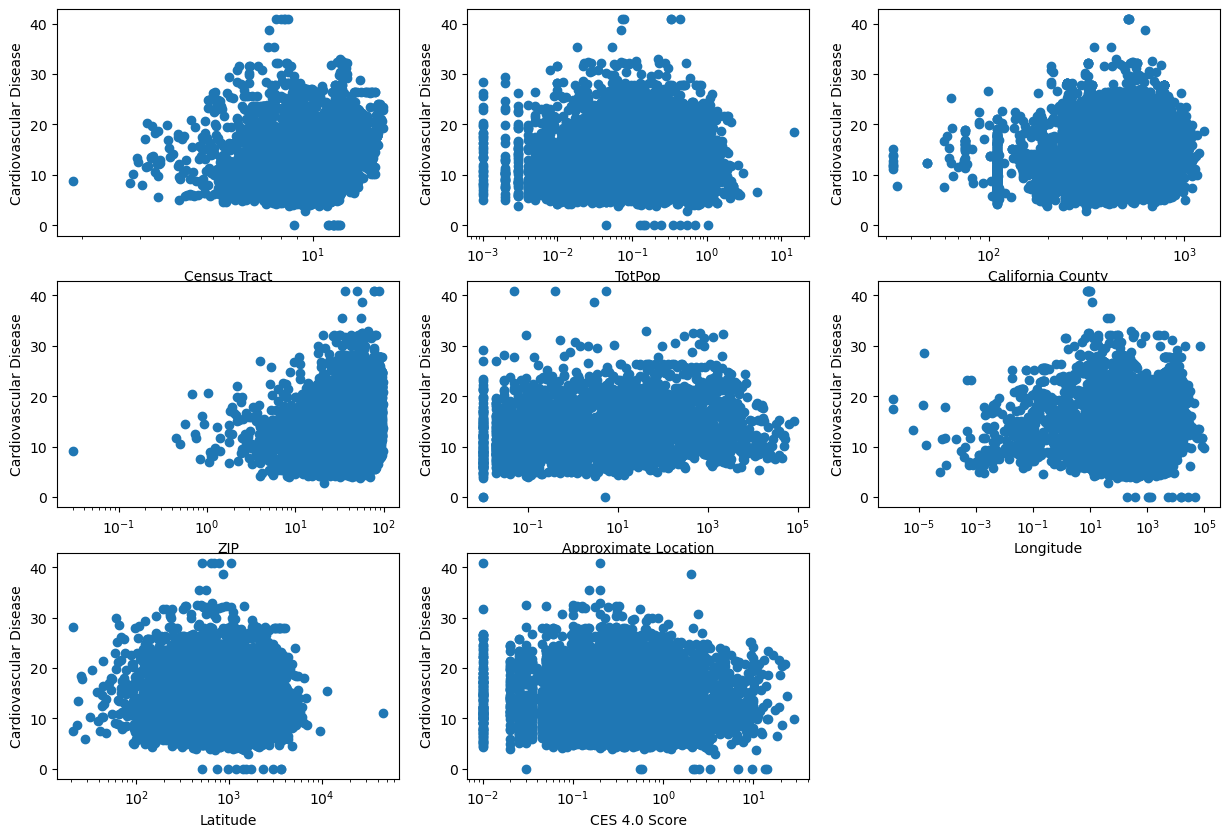

In [312]:
# visualize relationships between the dependent variable y and the independent variables.

# this is not for feature selection. I will use all of these features. It is only for visualization purposes.

plt.figure(figsize=(15,10))
for i in range(x.shape[1]):
    plt.subplot(3,3,i+1)
    plt.xscale("log")
    plt.scatter(x[:,i],y)
    plt.xlabel(df.columns[i])
    plt.ylabel('Cardiovascular Disease')
plt.show()


In [313]:
print(type(newdf))


<class 'pandas.core.frame.DataFrame'>


In [314]:
# import necessary machine learning libraries/packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [315]:
# Split the dataset to create the train and test data
#print(x)
#print(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)


(6428, 8)
(1607, 8)


In [329]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor(n_estimators=800, max_depth=20, max_features = 8, oob_score = True) 
# I found these model parameters to be fitting. Not too much computational energy, but obtains errors much lower than
# more simple ensemble forests.

reg_rf.fit(X_train, y_train)

y_pred = reg_rf.predict(X_test)

print('R^2 score on testing data =', reg_rf.score(X_test, y_test))
y_pred


R^2 score on testing data = 0.49702983987069427


array([ 9.82313474, 14.39848613, 13.42277769, ..., 13.31931915,
        8.89109325, 12.90869258])

In [330]:
# Now, we analyze the difference between original and predicted values.
from sklearn.metrics import mean_squared_error


# Have to chose a unique index varibale to acquire long and lat from original dataframe. I chose 'Traffic' because
# the values are all unique.
with_results = pd.DataFrame({'Traffic': X_test[:,6], 'Y_original': y_test, 'Y_predicted': y_pred})
#print(with_results['Traffic'])

merged_data = pd.merge(with_results, df[['Traffic', 'Longitude', 'Latitude','TotPop']], on='Traffic')
#print(merged_data)

# Create error columns in the new dataframe
mse = mean_squared_error(merged_data['Y_original'], merged_data['Y_predicted'])

merged_data['Absolute_Error'] = abs(merged_data['Y_predicted'] - merged_data['Y_original'])


print(merged_data)

          Traffic  Y_original  Y_predicted   Longitude   Latitude  TotPop  \
0      885.696410       15.93     9.823135 -121.981505  37.616301    2799   
1      785.439020        7.93    14.398486 -120.718138  39.224177    2932   
2       44.440906       16.39    13.422778 -120.083897  37.372448    2576   
3      184.739902        6.37    15.304754 -120.152514  40.132404    3209   
4      340.035873       13.54    16.023779 -120.577381  36.626297    7406   
...           ...         ...          ...         ...        ...     ...   
1595  2797.690048       18.24    18.571393 -117.627950  34.084507    5788   
1596   190.515690        7.18    13.789812 -119.998022  35.219966    6793   
1597  1353.690856       12.69    13.319319 -120.418697  34.970553    6876   
1598  1190.589354        6.75     8.891093 -117.739158  33.563581    6480   
1599   554.203584       16.84    12.908693 -118.260948  34.166257    4711   

      Absolute_Error  
0           6.106865  
1           6.468486  
2     

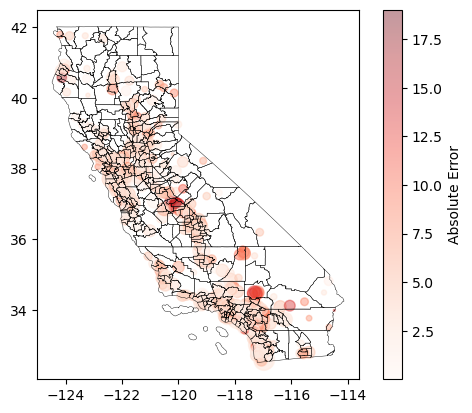

In [331]:
# Plot the Error Data and analayze it spatially again...
longitude = merged_data['Longitude'].values
latitude = merged_data['Latitude'].values
absolute_error = merged_data['Absolute_Error'].values
pop_2 = merged_data['TotPop']


plt.scatter(longitude,latitude,alpha=0.4,s=pop_2/100,c=absolute_error,cmap="Reds")
boundary_shapefile.plot(ax=plt.gca(), color='none', edgecolor='black', linewidth=0.3)  # Add county/region shapefile
plt.colorbar(label="Absolute Error", orientation="vertical") 
plt.show() 

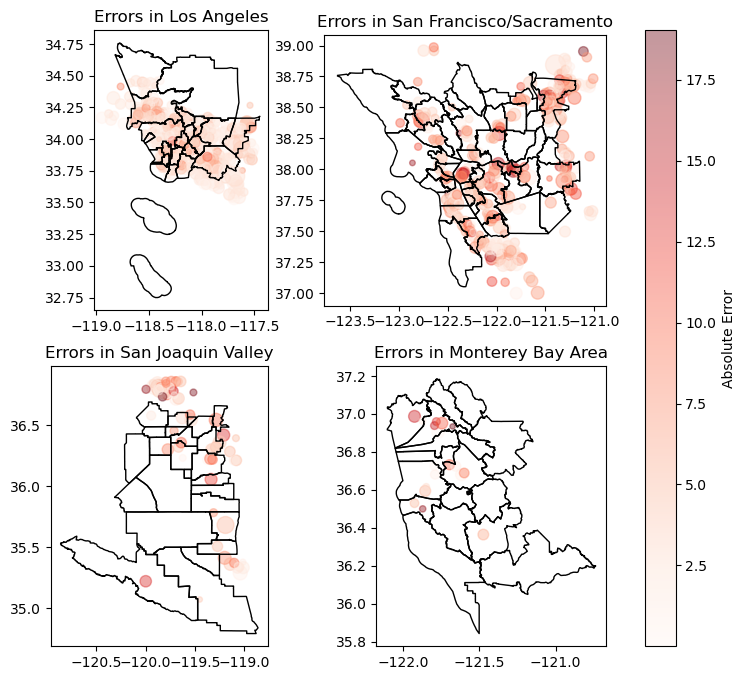

In [332]:
#Visualize subsets of Errors
latitude_range = (33.5, 34.5)
longitude_range = (-119, -117.5)

# Create new DataFrames of the Error DataFrame based on the subsets

#Los Angeles
subset1_df = merged_data.loc[(merged_data['Latitude'].between(*latitude_range)) & (merged_data['Longitude'].between(*longitude_range))]
lat = subset1_df['Latitude']
long = subset1_df['Longitude']
pop = subset1_df['TotPop']
err = subset1_df['Absolute_Error']

# San Francisco Bay Area
subset2_df = merged_data.loc[(merged_data['Latitude'].between(*latitude_range2)) & (merged_data['Longitude'].between(*longitude_range2))]
lat2 = subset2_df['Latitude']
long2 = subset2_df['Longitude']
pop2 = subset2_df['TotPop']
err2 = subset2_df['Absolute_Error']

# San Joaquin Valley
subset3_df = merged_data.loc[(merged_data['Latitude'].between(*latitude_range3)) & (merged_data['Longitude'].between(*longitude_range3))]
lat3 = subset3_df['Latitude']
long3 = subset3_df['Longitude']
pop3 = subset3_df['TotPop']
err3 = subset3_df['Absolute_Error']

# Monterey Bay Area
subset4_df = merged_data.loc[(merged_data['Latitude'].between(*latitude_range4)) & (merged_data['Longitude'].between(*longitude_range4))]
lat4 = subset4_df['Latitude']
long4 = subset4_df['Longitude']
pop4 = subset4_df['TotPop']
err4 = subset4_df['Absolute_Error']

# Plot all four errors by geography:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

scatter2 = axes[0, 0].scatter(long, lat, alpha=0.4, s=pop/100, c=err, cmap=plt.get_cmap("Reds"))
axes[0, 0].set_title('Errors in Los Angeles')

filtered_shapefileLA.plot(ax=axes[0, 0], color='none', edgecolor='black')  # Add county/regions shapefile

axes[0, 1].scatter(long2, lat2, alpha=0.4, s=pop2/100, c=err2, cmap=plt.get_cmap("Reds"))
axes[0, 1].set_title('Errors in San Francisco/Sacramento')

filtered_shapefileSF.plot(ax=axes[0, 1], color='none', edgecolor='black') # # Add county/region shapefile

axes[1, 0].scatter(long3, lat3, alpha=0.4, s=pop3/100, c=err3, cmap=plt.get_cmap("Reds"))
axes[1, 0].set_title('Errors in San Joaquin Valley')

filtered_shapefileSJV.plot(ax=axes[1, 0], color='none', edgecolor='black') # # Add county/region shapefile

axes[1, 1].scatter(long4, lat4, alpha=0.4, s=pop4/100, c=err4, cmap=plt.get_cmap("Reds"))
axes[1, 1].set_title('Errors in Monterey Bay Area')

filtered_shapefileMBA.plot(ax=axes[1, 1], color='none', edgecolor='black') # # Add county/region shapefile

cbar = plt.colorbar(scatter2, ax=axes, orientation='vertical', label='Absolute Error')



In [333]:
# Examine average errors per geographic subset
LAaverage_value = subset1_df['Absolute_Error'].mean()
SFaverage_value = subset2_df['Absolute_Error'].mean()
SJVaverage_value = subset3_df['Absolute_Error'].mean()
MBAaverage_value = subset4_df['Absolute_Error'].mean()


print(f"The average of Los Angeles Error is: {LAaverage_value}")
print(f"The average of San Francisco Error is: {SFaverage_value}")
print(f"The average of San Joaquin Valley Error is: {SJVaverage_value}")
print(f"The average of Monterey Bay Area Error is: {MBAaverage_value}")





The average of Los Angeles Error is: 2.4300904359444506
The average of San Francisco Error is: 2.339019542071358
The average of San Joaquin Valley Error is: 2.6687371524298147
The average of Monterey Bay Area Error is: 2.175464419439722


Feature ranking:
1. Tox. Release (0.207318)
2. PM2.5 (0.199473)
3. Lead (0.177376)
4. Drinking Water (0.164411)
5. Traffic (0.082176)
6. Diesel PM (0.067174)
7. Haz. Waste (0.059314)
8. Pesticides (0.042758)


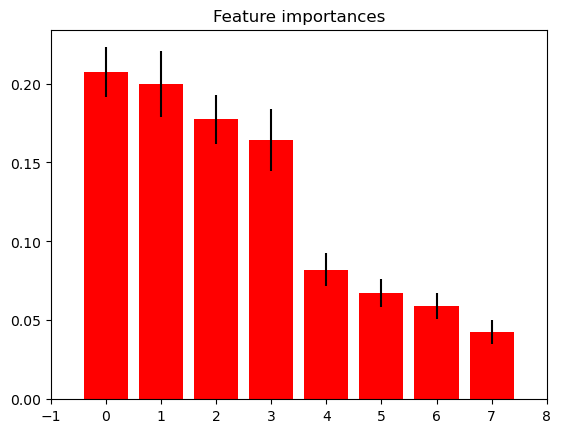

In [328]:
#Calculate the importance of each feature:
importances = reg_rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in reg_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

#print the feature ranking
print("Feature ranking:")
for f in range(x.shape[1]):
    
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print("%d. %s (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))
    

#plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
#plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

In [ ]:
# Done!

# This code can and should be modified with new data, new machine learning algorithms, and different geographic
# study areas.